In [12]:
import pandas as pd
feature = pd.read_csv("./fruit.csv", index_col = 0)
features = feature.copy()

In [13]:
features

,당도,아삭함,종류
이름,,,
오렌지,7,3,과일
포도,8,5,과일
견과류,3,6,단백질
새우,2,3,단백질
생선,3,1,단백질
콩,3,7,채소
베이컨,1,4,단백질
바나나,10,1,과일
배,10,7,과일


In [15]:
features.drop('종류',axis=1,inplace=True)

In [16]:
features


,당도,아삭함
이름,,
오렌지,7,3
포도,8,5
견과류,3,6
새우,2,3
생선,3,1
콩,3,7
베이컨,1,4
바나나,10,1
배,10,7


In [17]:

from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(features)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(features)

cluster[1 1 0 0 0 0 0 1 1 0 0 0 1 0 0]
중심점: [[2.4 5.9]
 [9.  5. ]]
응집도: 171.3


/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-171.3

/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/an

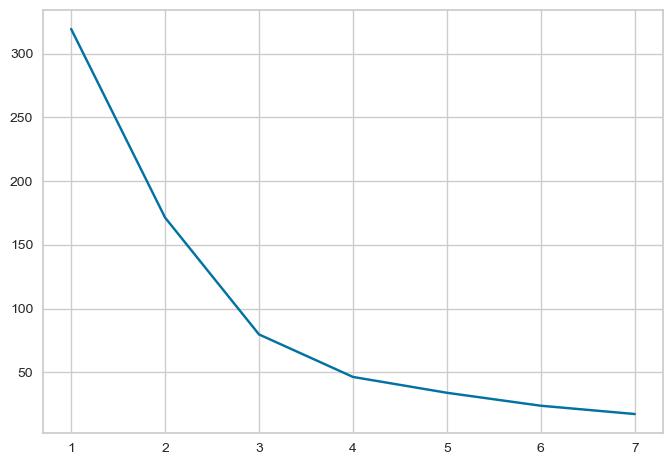

In [18]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

iris = features
temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(iris)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dongha/an

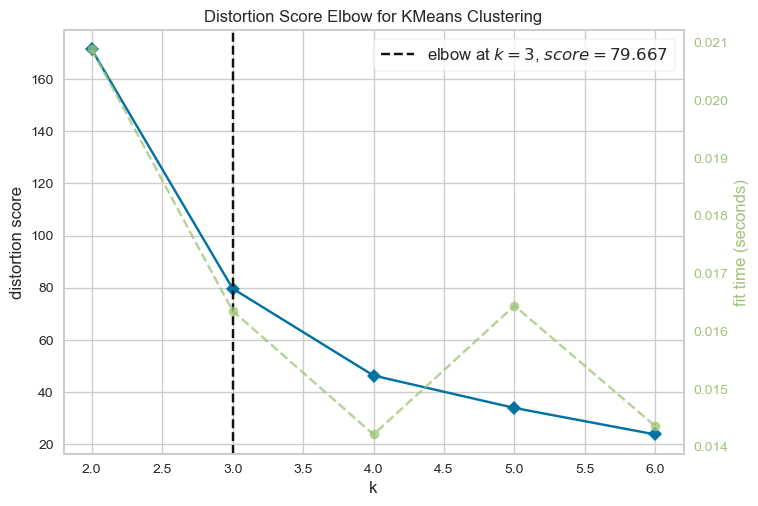

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer


visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(features) 
visualizer.show() 

In [20]:
!pip install yellowbrick

In [21]:
import pandas as pd
feature = pd.read_csv("./fruit.csv", index_col = 0)
features = feature.copy()

In [22]:
features

,당도,아삭함,종류
이름,,,
오렌지,7,3,과일
포도,8,5,과일
견과류,3,6,단백질
새우,2,3,단백질
생선,3,1,단백질
콩,3,7,채소
베이컨,1,4,단백질
바나나,10,1,과일
배,10,7,과일


In [23]:
features['종류']= features['종류'].replace({'단백질': 1, '과일': 0,'채소': 2})

In [24]:
features

,당도,아삭함,종류
이름,,,
오렌지,7,3,0
포도,8,5,0
견과류,3,6,1
새우,2,3,1
생선,3,1,1
콩,3,7,2
베이컨,1,4,1
바나나,10,1,0
배,10,7,0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 'features' 데이터프레임에서 종류 열을 레이블로 분리
X = features.drop('종류', axis=1)
y = features['종류']

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 모델 평가
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)


In [67]:
acc

0.8